In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Chụp';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await new Promise((resolve) => {
          video.onloadedmetadata = () => {
            resolve();
          };
        });
        video.play();

        // Resize the output to fit the current frame.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();

        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        div.remove();
        return dataUrl;
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Tải mô hình đã huấn luyện
model = load_model('/content/drive/MyDrive/modelCNN.h5')

# Các loài chó đã chọn
breed_names = [
    'Basset', 'Chihuahua', 'Chow_dog', 'Cocker_spaniel_dog',  'Dalmatian', 'Husky',  'Labrador_dog', 'Maltese_dog',  'Pakinese_dog', 'Papillon', 'Peagle', 'Pug','Shiba Inu', 'Shih Tzu'
]

while True:
    try:
        filename = take_photo()
        print('Saved to {}'.format(filename))

        # Hiển thị ảnh
        img = cv2.imread(filename)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img_rgb)
        plt.axis('off')
        plt.show()

        # Tiền xử lý ảnh
        img = cv2.resize(img, (128, 128))
        img = img.astype('float32') / 255.0
        img = np.expand_dims(img, axis=0)

        # Dự đoán loài chó
        preds = model.predict(img)
        breed = breed_names[np.argmax(preds)]
        print(f'Loài chó dự đoán: {breed}')

    except Exception as e:
        print(str(e))


OSError: No file or directory found at /content/drive/MyDrive/modelCNN.h5

<IPython.core.display.Javascript object>

Saved to photo.jpg


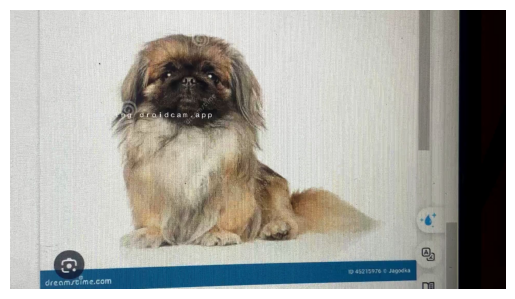

1/1 [==============================] - 0s 87ms/step
Loài chó dự đoán: Shih Tzu


In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Chụp';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await new Promise((resolve) => {
          video.onloadedmetadata = () => {
            resolve();
          };
        });
        video.play();

        // Resize the output to fit the current frame.
        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();

        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        div.remove();
        return dataUrl;
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

# Tải mô hình đã huấn luyện
model = load_model('/content/drive/MyDrive/model.h5')

# Các loài chó đã chọn
breed_names = [
    'Basset', 'Chihuahua', 'Chow_dog', 'Cocker_spaniel_dog',  'Dalmatian', 'Husky',  'Labrador_dog', 'Maltese_dog',  'Pakinese_dog', 'Papillon', 'Peagle', 'Pug','Shiba Inu', 'Shih Tzu'
]

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Hiển thị ảnh
    img = cv2.imread(filename)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

    # Tiền xử lý ảnh
    img = cv2.resize(img, (128, 128))
    img = img.astype('float32') / 255.0
    img = np.expand_dims(img, axis=0)

    # Dự đoán loài chó
    preds = model.predict(img)
    breed = breed_names[np.argmax(preds)]
    print(f'Loài chó dự đoán: {breed}')

except Exception as e:
    print(str(e))